CONTEXT

Cars4U is a tech start-up which aims to improve its ability to sale second hand cars.

OBJECTIVES

1. Analyse the data set
2. Preprocess the data
3. Fit a linear regression model that predicts price
4. Draw insights and offer recommendations

QUESTIONS

1. What are the key factors influencing the price of used cars?
2. Could a predictive model be designed?
3. What would the performance of such a model be?
4. What marketing insights and strategies could be inferred from the results?

DATA INFORMATION

Data Dictionary

1. S.No.: Serial number
2. Name: Name of the car which includes brand name and model name
3. Location: Location in which the car is being sold or is available for purchase (cities)
4. Year: Manufacturing year of the car
5. Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
6. Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
7. Transmission: The type of transmission used by the car (Automatic/Manual)
8. Owner: Type of ownership
9. Mileage: The standard mileage offered by the car company in kmpl or km/kg
10. Engine: The displacement volume of the engine in CC
11. Power: The maximum power of the engine in bhp
12. Seats: The number of seats in the car
13. New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
14. Price: The price of the used car in INR Lakhs

In [2]:
# import the needed libraries

import numpy as np
import pandas as pd
import pandas_profiling

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [3]:
# load the data set and create a data frame

df = pd.read_csv('used_cars_data.csv', index_col = 0)

# obtain a random, thus more representative, snippet of the data
np.random.seed(1)
df.sample(n=10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47,6.00
3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44,4.11
4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,35.29,6.00
3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,86.97,35.28
4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,8.23,6.34
599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05,24.82
186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,86.97,32.00
305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,67.10,20.77
4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,10.25,2.50


In [4]:
# view the shape of the data

df.shape

(7253, 13)

In [5]:
# checking for duplicate values in the data

df.duplicated().sum()

1

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.00,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.00,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.00,5.00,5.00,10.0
New_Price,7253.0,21.307322,24.256314,3.91,7.88,11.30,21.69,375.0
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.0


In [7]:
# obtain a brief overview of our columns

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7078 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          7253 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 793.3+ KB


STEP 1 PROCESSING COLUMNS

We notice that the following columns have null values: Mileage, Engine, Power, Price, and Seats. Also, the following columns must be converted into numericals: Mileage, Engine, and Power.

In [8]:
# further inverstigate the existance of missing values

df.isnull().sum().sort_values(ascending=False)

Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
New_Price               0
dtype: int64

The Price seems to have the most missing values. Since this is the target variable, it is better to remove those rows with the missing values.

In [9]:
# select a data frame without the missing values from Price

df = df[df["Price"].notna()]


In [10]:
# reset the dataframe index

df.reset_index(inplace=True, drop=True)

With missing Prices removed, there are Power, Seats, Engine and Mileage to deal with. Power, Engine and Mileage need to be converted into numerical first. 

In [11]:
# convert the following cols into floats by removing the units

cols = ['Mileage', 'Engine', 'Power']

for col in cols:
    for x in range(len(df[col])):
        if isinstance(df[col].iloc[x], str):
            df[col].iloc[x] = float(df[col].iloc[x].split()[0])
        else:
            df[col].iloc[x] = np.nan 

C:\Users\Cosmin\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [12]:
# Engine, Mileage and Power were not succesfully converted to float before but will not be needed for the correlation matrix

df['Engine'] = df['Engine'].astype(float)
df['Power'] = df['Power'].astype(float)
df['Mileage'] = df['Mileage'].astype(float)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6019.0,2013.358199,3.269742,1998.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.00,34000.00,53000.00,73000.00,6500000.00
Mileage,6017.0,18.134961,4.582289,0.00,15.17,18.15,21.10,33.54
Engine,5983.0,1621.276450,601.355233,72.00,1198.00,1493.00,1984.00,5998.00
Power,5876.0,113.253050,53.874957,34.20,75.00,97.70,138.10,560.00
Seats,5977.0,5.278735,0.808840,0.00,5.00,5.00,5.00,10.00
New_Price,6019.0,21.499855,24.332922,3.91,7.88,11.30,21.77,375.00
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.00


Observe that the min for Mileage is 0, which is not possible. This needs further investigation

In [14]:
# calculate how many zero entries are there

df[df['Mileage'] == 0.00]['Mileage'].count()



68

In [15]:
# treat them as nans by converting them

for x in range(len(df['Mileage'])):
    if df['Mileage'].iloc[x] == 0:
        df['Mileage'].iloc[x] = np.nan
        
df.isnull().sum().sort_values(ascending=False)

C:\Users\Cosmin\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Power                143
Mileage               70
Seats                 42
Engine                36
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
New_Price              0
Price                  0
dtype: int64

STEP 2 - MISSING VALUES

To deal with the missing values from Mileage, Engine and Power we will decide based on their distribution which measure is most appropriate.

MILEAGE 

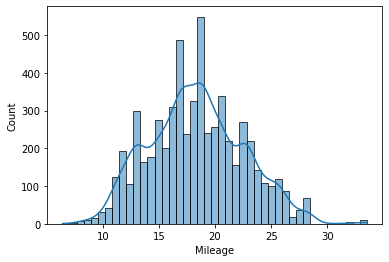

In [16]:
# first I investigate the distribution of Mileage

sns.histplot(df['Mileage'], kde = True);

There are 70 missing values in Mileage and it has a relatively normal distribution, therefore I will imput the average of the col for the missing values.

In [17]:
# use fillna to replace nans with the mean of the column
# make sure to calculate mean from the Mileage column with the nans, which would affect the result

df['Mileage'].fillna(np.mean(df[df['Mileage'].notna()]['Mileage']), inplace = True)

ENGINE

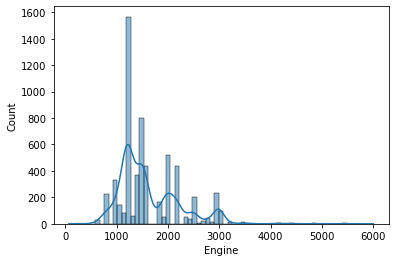

In [18]:
# first I investigate the distribution of Engine size

sns.histplot(df['Engine'], kde = True);

The distribution appears to be right skewed, therefore I will use the median.

In [19]:
# Use fillna to replace nans with the median of the column

df['Engine'].fillna(np.median(df[df['Engine'].notna()]['Engine']), inplace = True)

POWER

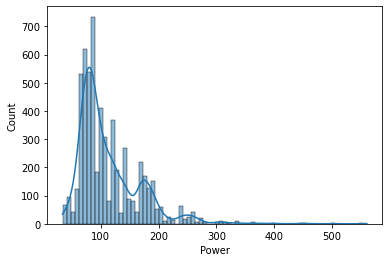

In [20]:
# check the distribution

sns.histplot(df['Power'], kde = True);

Again, the distribution is right skewed, thus the median is more appropriate.

In [21]:
# use fillna to replace nans with median

df['Power'].fillna(np.median(df[df['Power'].notna()]['Power']), inplace = True)

SEATS - these are the remaining missing values. I will replace the missing values with the most often occuring value.

In [22]:
# see the most often occuring value

df['Seats'].value_counts()

5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

Notice that there is one car with zero seats, this must be an error. We will convert it to missing value and replace it toghether with the others.

In [23]:
for x in range(len(df['Seats'])):
    if df['Seats'].iloc[x] == 0:
        df['Seats'].iloc[x] = np.nan

C:\Users\Cosmin\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [24]:
# 5 seats are by far the largest category, I will therefore impute 5 for the missing values

df['Seats'].fillna(5, inplace = True)

All the missing values have now been dealt with.

In [25]:
df.isnull().sum().sort_values(ascending=False)

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [26]:
# now that missing values were imputed and the 3 cols converted to numerical values, 
# I will use the describe function to further investigate the dataframe

df.describe() 

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,18.342252,1620.509221,112.883539,5.277621,21.499855,9.479468
std,3.269742,9.126884e+04,4.151120,599.635458,53.283701,0.803479,24.332922,11.187917
min,1998.000000,1.710000e+02,6.400000,72.000000,34.200000,2.000000,3.910000,0.440000
25%,2011.000000,3.400000e+04,15.400000,1198.000000,78.000000,5.000000,7.880000,3.500000
50%,2014.000000,5.300000e+04,18.342252,1493.000000,97.700000,5.000000,11.300000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1969.000000,138.030000,5.000000,21.770000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,375.000000,160.000000


Quick overview shows that some features (e.g. engine, power, new_price etc.) have obvious outliers. These need to be investigated and removed.

STEP 3 - OUTLIERS

Begin by visualising the distribution of the numerical features using a histogram and a scatterplot.

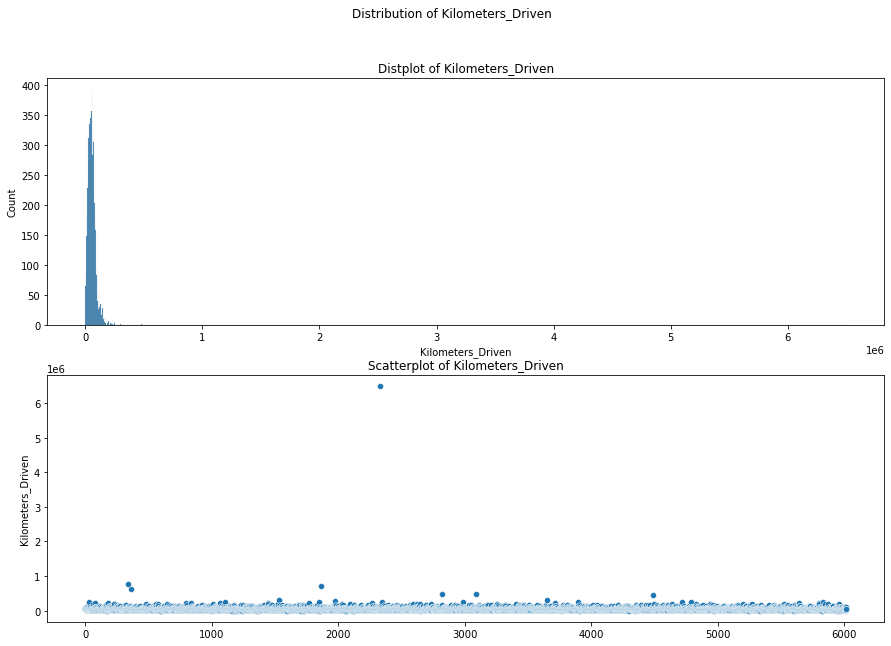

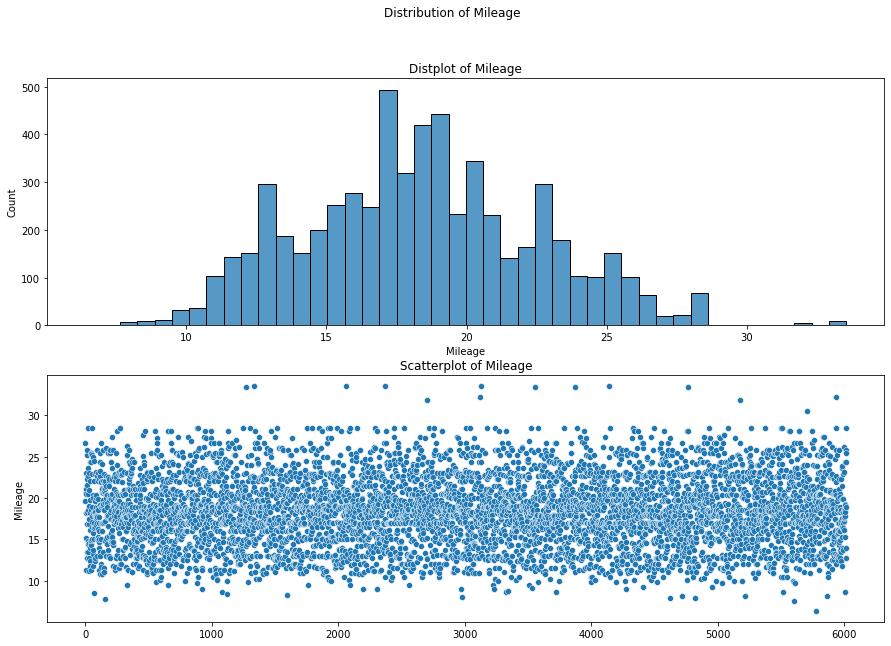

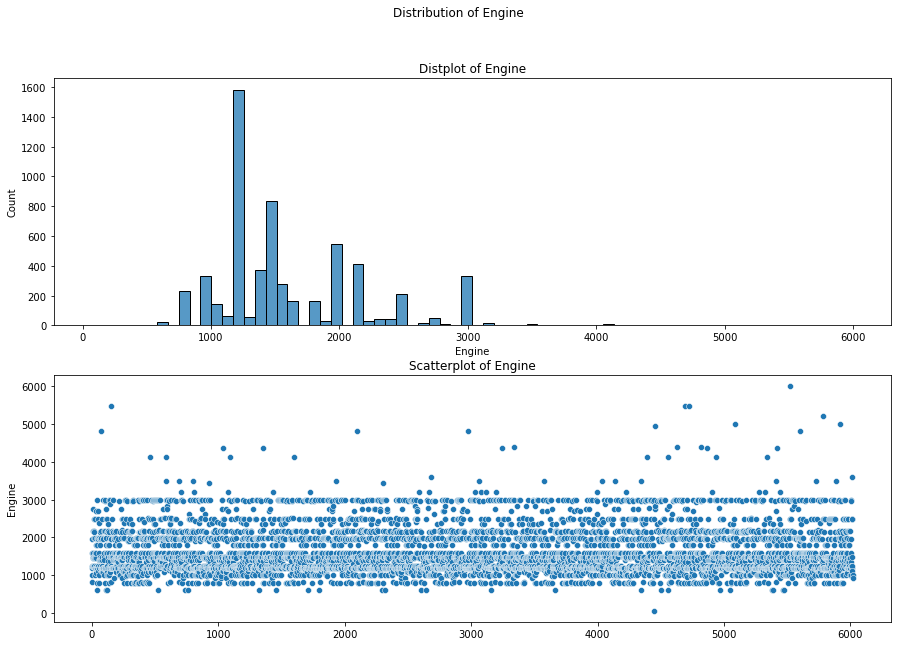

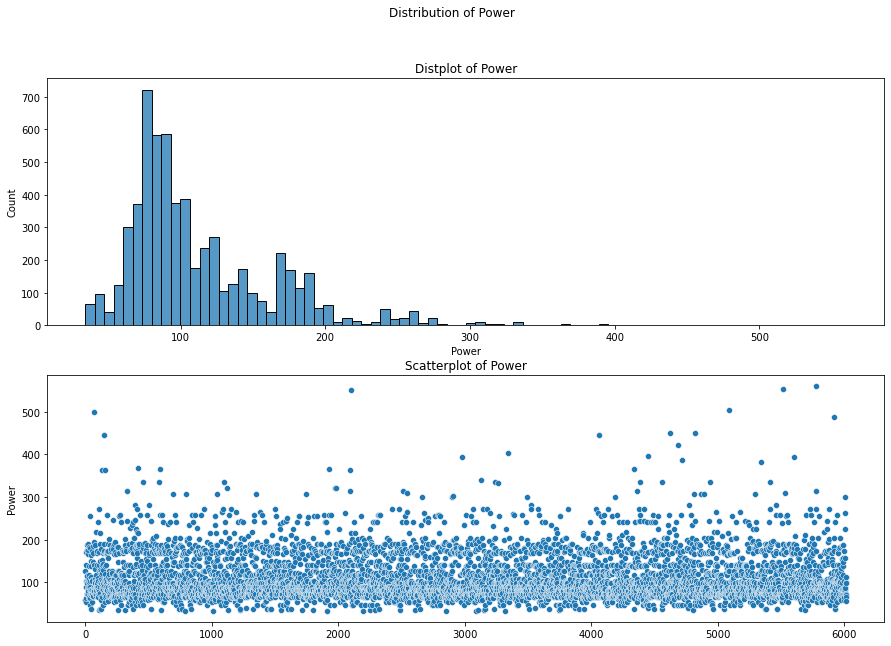

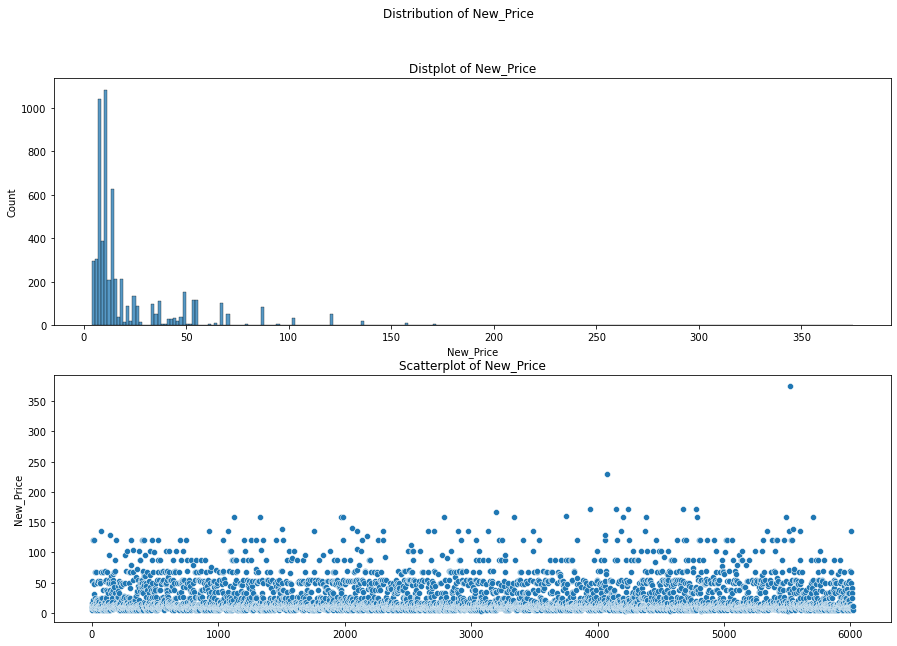

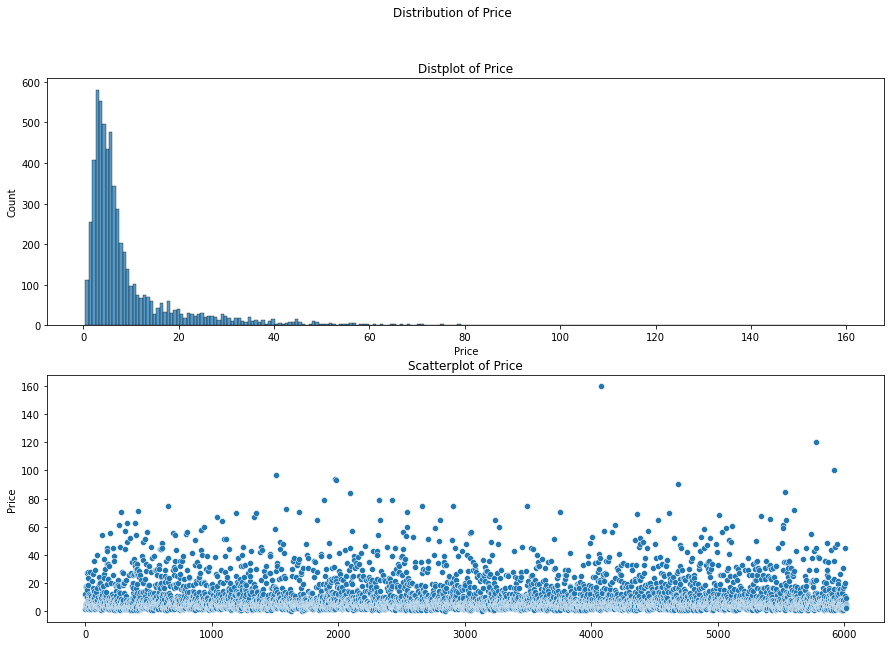

In [27]:
cols = ['Kilometers_Driven', 'Mileage',	'Engine', 'Power', 'New_Price', 'Price']

for col in cols:
    fig = plt.figure(figsize = (15,10))
    fig.suptitle(f'Distribution of {col}')

    plt.subplot(211)
    plt.title(f'Distplot of {col}')
    sns.histplot(df[col]);

    plt.subplot(212)
    plt.title(f'Scatterplot of {col}')
    sns.scatterplot(data = df[col]);
    

These graphs show that there seems to be 2 categories of outliers: a) very obvious ones (for Km driven, new price and price) and b) potential ones that need further inverstigation (for mileage, engine and power)

In [28]:
# for category a) there is just one obvious outlier in each, I will remove the entire row for each of these outliers
# first I will create a list with the indices corresponding to the rows containing the outliers

cols = ['New_Price', 'Price', 'Kilometers_Driven']
rows_remove = []

for col in cols:
    rows_remove.append(list(df[df[col] == df[col].max()].index)[0])

rows_remove


[5521, 4079, 2328]

In [29]:
# I will now remove them

df.drop([5521, 4079, 2328], axis = 0, inplace = True)
df.reset_index(inplace=True, drop=True)

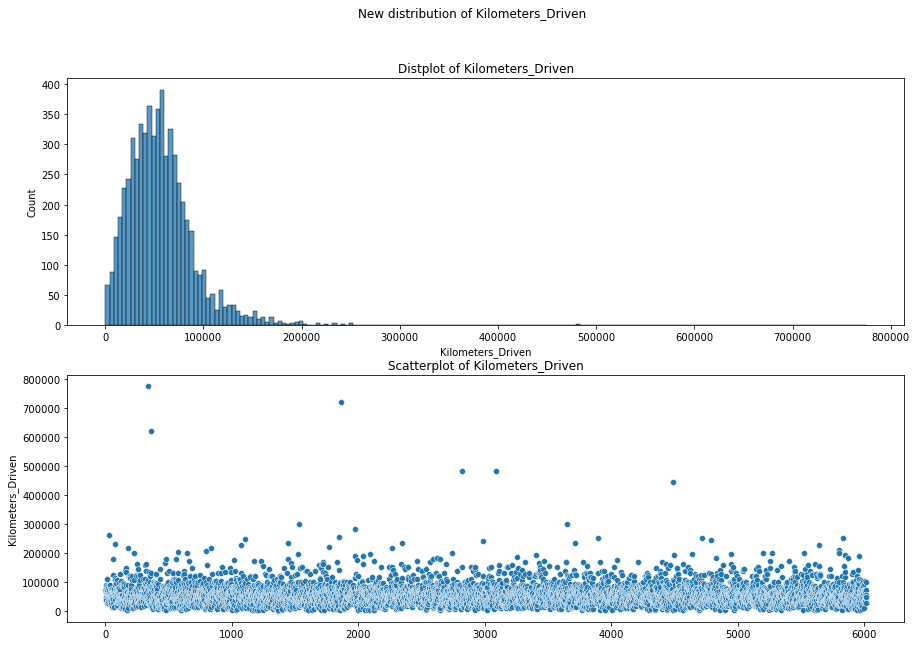

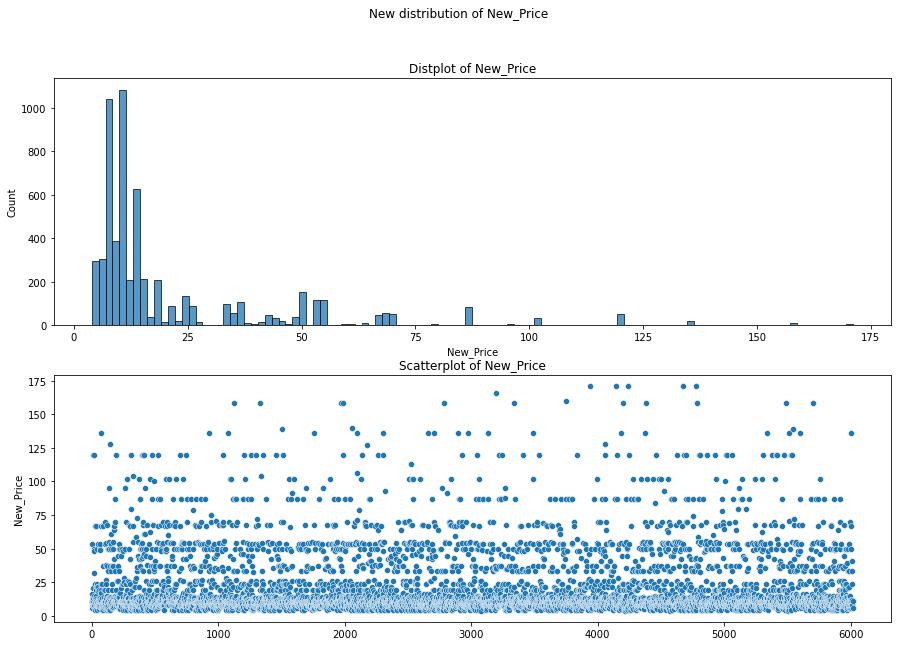

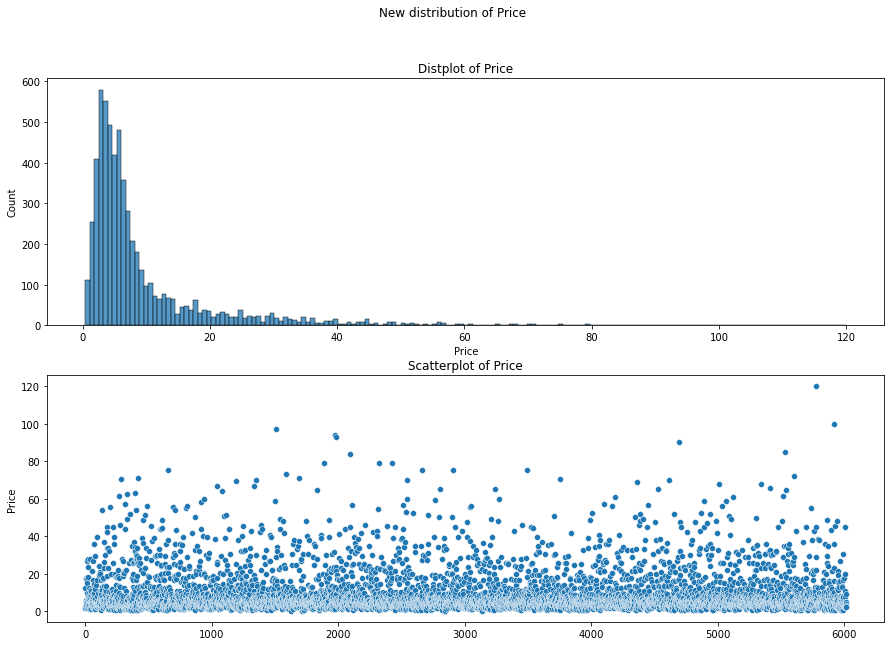

In [30]:
# the new distributions
cols = ['Kilometers_Driven', 'New_Price', 'Price']

for col in cols:
    fig = plt.figure(figsize = (15,10))
    fig.suptitle(f'New distribution of {col}')

    plt.subplot(211)
    plt.title(f'Distplot of {col}')
    sns.histplot(df[col]);

    plt.subplot(212)
    plt.title(f'Scatterplot of {col}')
    sns.scatterplot(data = df[col]);

There are still some potential outliers, especially in the km driven col. Therefore, I will add these 3 to category b), to be further processed.

In [31]:
# for category b) I will use the inter-quartile range method to eliminate outliers, however this is dependent upon type of distribution
# normal-like distributions: Mileage
# skewed distributions: Engine, Power, New_Price, Price, Kilometers_Driven

cols = ['Engine', 'Power', 'New_Price', 'Price', 'Kilometers_Driven', 'Mileage']

for col in cols:
    quartiles = np.quantile(df[col][df[col].notnull()], [.25, .75])
    iqr4 = 4 * (quartiles[1] - quartiles[0])
    print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {iqr4}')
    if col == 'Mileage':
        outliers = df.loc[np.abs(df[col] - df[col].mean()) > iqr4, col] # I use mean here because the distribution is normal
        count = outliers.count()
        print(f'Entries outside 4*IQR for Mileage: {count}')
    else:
        outliers = df.loc[np.abs(df[col] - df[col].median()) > iqr4, col] # median for skewed distributions
        count = outliers.count()
        print(f'Entries outside 4*IQR for {col}: {count}')

Q1 = 1198.0, Q3 = 1968.25, 4*IQR = 3081.0
Entries outside 4*IQR for Engine: 11
Q1 = 78.0, Q3 = 138.03, 4*IQR = 240.12
Entries outside 4*IQR for Power: 24
Q1 = 7.88, Q3 = 21.77, 4*IQR = 55.56
Entries outside 4*IQR for New_Price: 398
Q1 = 3.5, Q3 = 9.95, 4*IQR = 25.799999999999997
Entries outside 4*IQR for Price: 321
Q1 = 34000.0, Q3 = 73000.0, 4*IQR = 156000.0
Entries outside 4*IQR for Kilometers_Driven: 28
Q1 = 15.4, Q3 = 21.1, 4*IQR = 22.800000000000004
Entries outside 4*IQR for Mileage: 0


Engine has 11, Power has 24 and Km driven has 28, these look like outliers, given that they are few in number and also because they stand out in the scatterplot. New price and price have over 300 outliers which I interpret the mean that these form a specific cluster of very expensive cars. In conclusion: I will eliminate the outliers from Engine, Power and Km driven, but leave new price and price ones.

In [32]:
cols = ['Engine', 'Power', 'Kilometers_Driven']

for col in cols:
    quartiles = np.quantile(df[col][df[col].notnull()], [.25, .75])
    iqr4 = 4 * (quartiles[1] - quartiles[0])
    outliers = df.loc[np.abs(df[col] - df[col].median()) > iqr4].index
    df.drop(outliers, axis = 0, inplace = True)
df.reset_index(inplace=True, drop=True)

In [33]:
# check that all outliers have been removed

cols = ['Engine', 'Power', 'Kilometers_Driven']

for col in cols:
    quartiles = np.quantile(df[col][df[col].notnull()], [.25, .75])
    iqr4 = 4 * (quartiles[1] - quartiles[0])
    print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {iqr4}')
    outliers = df.loc[np.abs(df[col] - df[col].median()) > iqr4, col] # I use mean here because the distribution is normal
    count = outliers.count()
    print(f'Entries outside 4*IQR for Mileage: {count}')


Q1 = 1198.0, Q3 = 1968.0, 4*IQR = 3080.0
Entries outside 4*IQR for Mileage: 0
Q1 = 76.875, Q3 = 138.03, 4*IQR = 244.62
Entries outside 4*IQR for Mileage: 0
Q1 = 34000.0, Q3 = 72506.0, 4*IQR = 154024.0
Entries outside 4*IQR for Mileage: 0


STEP 4 - FEATURE ENGINEERING

DEPRECIATION LEVEL - col Year contains too many unique values, which on their own do not add too much to the pricing. Instead, based on the depreciation curve (https://www.theaa.com/car-buying/depreciation), I will break down YEAR into 4 categories: less than a year (2019), 1-3 years (2016-2018), 4-8 years (2011-2015), 8 and beyond (<2011).

In [42]:
#  create a list to be filled. Append the depreciation levels based on production year
dep_level = []

for x in range(len(df['Year'])):
    if df['Year'].iloc[x] == 2019:
        dep_level.append('<1year')
    elif df['Year'].iloc[x] in [2016, 2017, 2018]:
        dep_level.append('1-3years')
    elif df['Year'].iloc[x] in [2011, 2012, 2013, 2014, 2015]:
        dep_level.append('4-8years')
    else:
        dep_level.append('beyond8')
df['Depreciation'] = dep_level

In [43]:
# Year can now be deleted

df.drop('Year', axis = 1, inplace = True)

USE - whilst dealing with the missing values from Seats, I noticed that there cars with 7,8,9 and even 10 seats. These cars cannot be personal cars. They most likely represent some sort of a business transport car (e.g. minivan). These cars should be expected to stand out in terms of km driven, mileage, power etc.

In [44]:
# check the seat categories

df['Seats'].value_counts()

5.0     5033
7.0      666
8.0      127
4.0       90
6.0       31
2.0       10
10.0       4
9.0        3
Name: Seats, dtype: int64

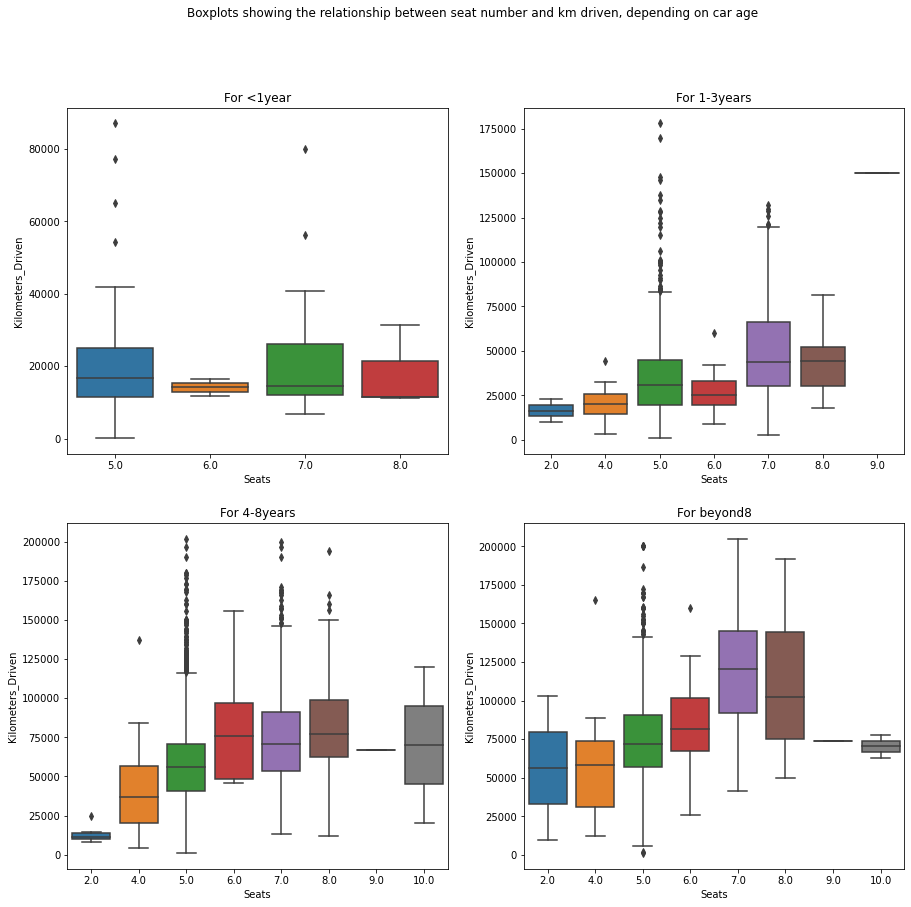

In [48]:
# investigate possible correlation with km driven, account for car age

fig = plt.figure(figsize = (15,14))
fig.suptitle('Boxplots showing the relationship between seat number and km driven, depending on car age')

plt.subplot(221)
plt.title('For <1year')
sns.boxplot(data = df[df['Depreciation'] =='<1year'], x = 'Seats', y = 'Kilometers_Driven');

plt.subplot(222)
plt.title('For 1-3years')
sns.boxplot(data = df[df['Depreciation'] =='1-3years'], x = 'Seats', y = 'Kilometers_Driven');

plt.subplot(223)
plt.title('For 4-8years')
sns.boxplot(data = df[df['Depreciation'] =='4-8years'], x = 'Seats', y = 'Kilometers_Driven');

plt.subplot(224)
plt.title('For beyond8')
sns.boxplot(data = df[df['Depreciation'] =='beyond8'], x = 'Seats', y = 'Kilometers_Driven');

It appears that, with the expection of less than a year old cars, where there was probably not enough time for km driven to accumulate, on average and regardless of age, more seats = more km driven. 

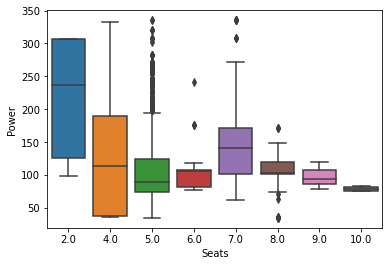

In [50]:
# furthermore, number of seats can signal a further category - sports cars, which are usually much more powerful than usual cars

sns.boxplot(data = df, x = 'Seats', y = 'Power');

Based on number of seats, I will create a new feature with three categories: sports cars, normal, and transport.

In [51]:
use = []
for x in range(len(df['Seats'])):
    if df['Seats'].iloc[x] == 2:
        use.append('sport')
    elif df['Seats'].iloc[x] > 6:
        use.append('transport')
    else:
        use.append('normal')
df['Use'] = use

CAR_CLASS - using the col New_Price, I will create a new feature based on price categories.

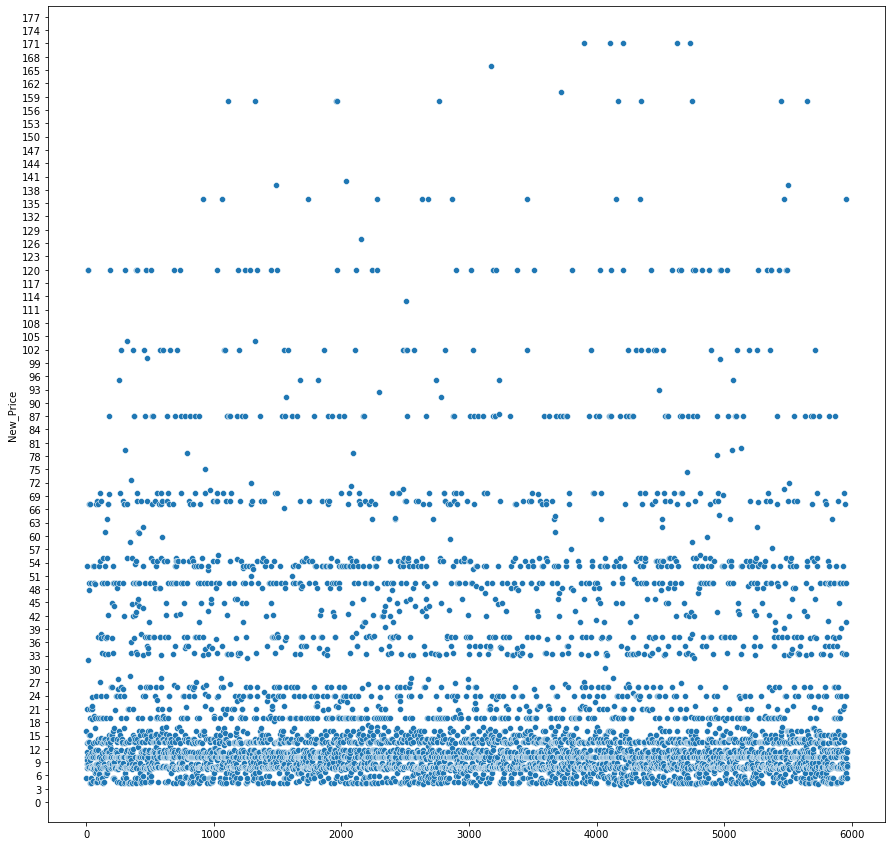

In [53]:
# investigate the scatterplot for possible clusters

fig = plt.figure(figsize = [15, 15])
fig = sns.scatterplot(data = df['New_Price'])
fig.set_yticks(np.arange(0,180,3));

In [54]:
# I have selected 6 clusters which I will now use to bin col New_Price

df['Car_class'] = pd.cut(
    df['New_Price'], [-np.inf, 18, 30, 51, 75, 123,  np.inf], 
    labels = ["very_cheap", "cheap", "medium", "expensive", "luxury", "ultra_lux"]
)

df['Car_class'].value_counts()

very_cheap    4190
medium         574
cheap          557
expensive      418
luxury         192
ultra_lux       33
Name: Car_class, dtype: int64

ENGINE_CLASS - col Engine would be better if binned, because the small differences between similarly sized engines to not hold enough information. The binning will be done according to the classification of engine size from this website https://carbiketech.com/engine-capacity-cc/

In [55]:
# 5 catergories have been selected based on the provided website

df['Engine_class'] = pd.cut(
    df['Engine'], [-np.inf, 1001, 1501, 1801, 2501, np.inf], 
    labels = ["XS", "S", "M", "L", "XL"]
)

df.drop('Engine', axis = 1, inplace = True) # drop Engine as I don't need it anymore
df['Engine_class'].value_counts()

S     3045
L     1272
M      598
XS     588
XL     461
Name: Engine_class, dtype: int64

Car MAKE - this is known to usually having a significant impact on the pricing, especially in the case of 'luxury' brands, such as Mercedes or Porsche.

In [56]:
# col Make is created by spliting name and selectin the first value, as it was observed to usually be the brand name
col_make = []
for x in range(len(df['Name'])):
    col_make.append(df['Name'].iloc[x].split()[0])
df['Make'] = col_make
# check whether there are any unusual values
df['Make'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Datsun', 'Jaguar',
       'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep', 'Smart',
       'Porsche', 'Ambassador', 'Isuzu', 'ISUZU', 'Force'], dtype=object)

In [57]:
# we cannot retrieve any more useful info from Name, it will be now dropped

df.drop('Name', axis = 1, inplace = True)

STEP 5 - EDA

UNIVARIATE ANALYSIS

In [58]:
# create a function to display the boxplot and histplot

def box_hist(data, col):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, sharex = True, figsize = [12,7]);
    sns.boxplot(data = data, x = col, ax = ax_box2, showmeans = True, color = 'green');
    sns.histplot(data = data, x = col, kde = True, ax = ax_hist2);
    ax_hist2.axvline(df[col].mean(), color = 'red', linestyle = "--");
    ax_hist2.axvline(df[col].median(), color = 'yellow', linestyle = "-");

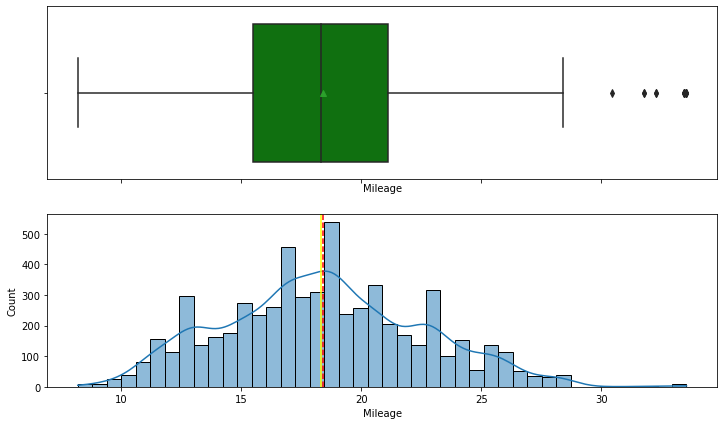

In [59]:
# apply to Mileage

box_hist(df, 'Mileage')

The distribution of Mileage appears to be relatively normal, with the mean and median almost equal. There are some outliers, but, as I have shown above (see Outliers), they are not outside the IQR*4

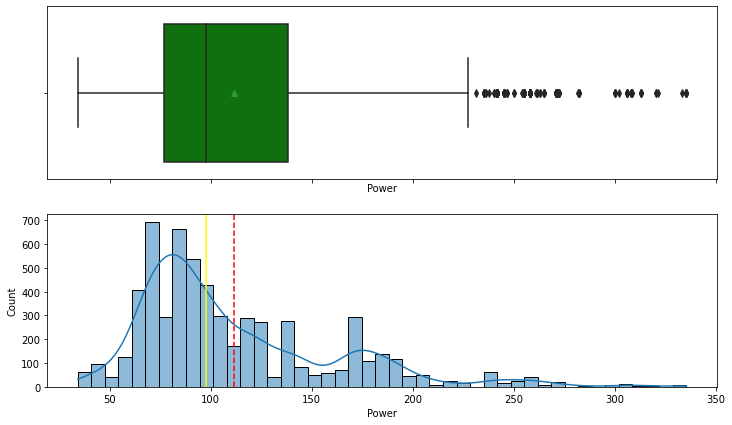

In [60]:
# apply to Power

box_hist(df, 'Power')

The distribution of Power is right skewed. These outliers are within the IQR*4 and will be kept.

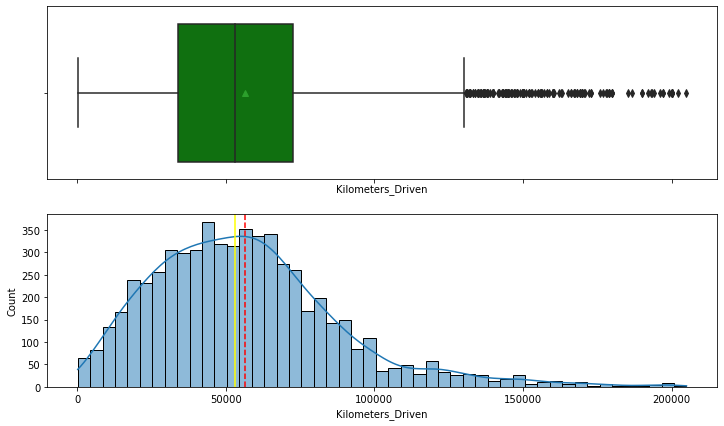

In [61]:
# apply to Km drive

box_hist(df, 'Kilometers_Driven')


Km driven is almost normal, having only a slight right tail. The outliers will be kept.

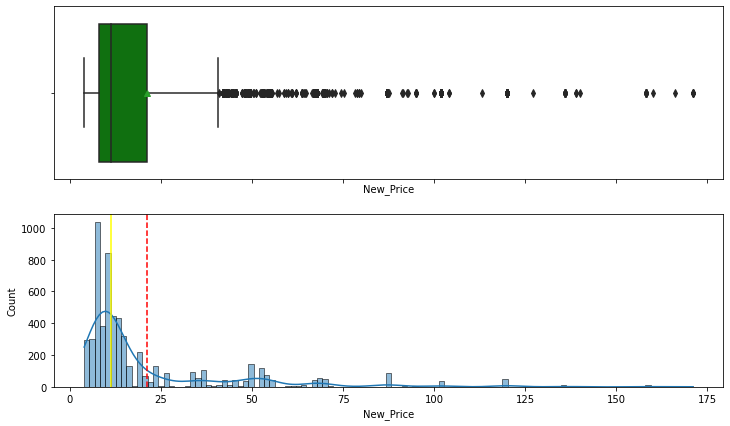

In [62]:
# apply to New Price

box_hist(df, 'New_Price')

The distribution of New Price is heavily skewed to the right and contains many outliers. However, given how many outliers there are here (over 300) and since the New Price is obviously very correlated to Price, I believe that they hold important information and have decided to keep them.

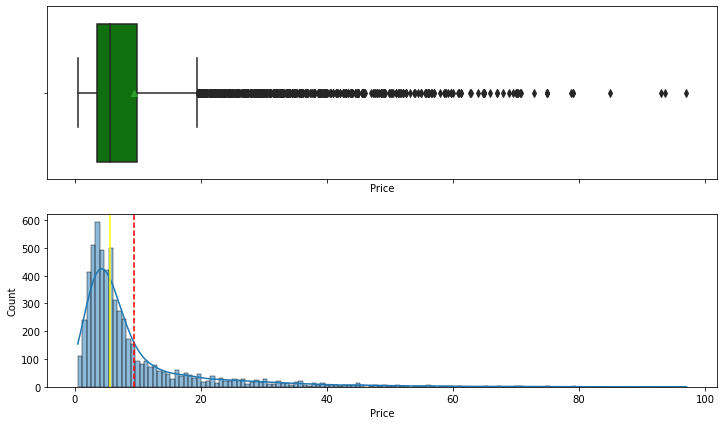

In [63]:
# apply to Km drive

box_hist(df, 'Price')

Just like New Price, Price is heavily skewed towards the right. For the above mentioned reasons, I will be keeping the many outliers from Price.

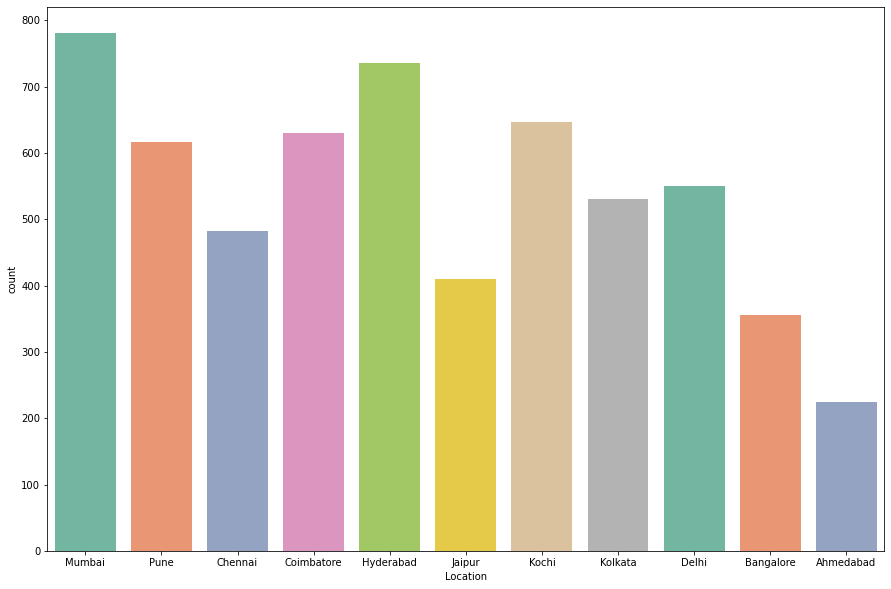

In [64]:
# create a count plot for Location
plt.figure(figsize = [15, 10]);
sns.countplot(data = df, x = 'Location', palette = 'Set2');

The majority of cars come from Mumbai and Hyderabad.

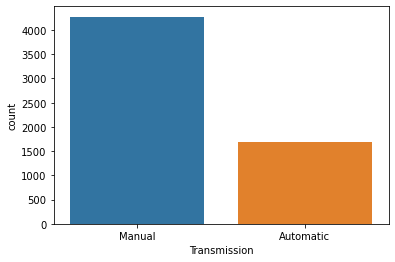

In [65]:
# create a count plot for Transmission

sns.countplot(data = df, x = 'Transmission');

<AxesSubplot:xlabel='Transmission', ylabel='count'>

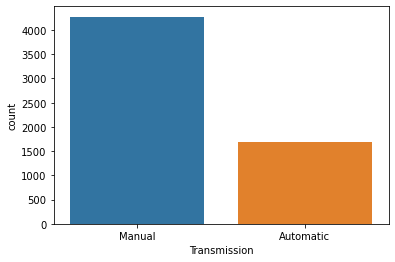

In [66]:
# create a count plot for Transmission

sns.countplot(data = df, x = 'Transmission')

There are more than twice as many Manual cars.

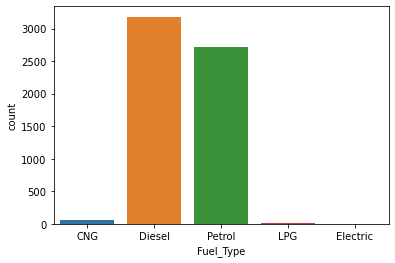

In [67]:
# create a count plot for Fuel type

sns.countplot(data = df, x = 'Fuel_Type');

Diesel and petrol are close to each other, whilst the rest are almost negligible.




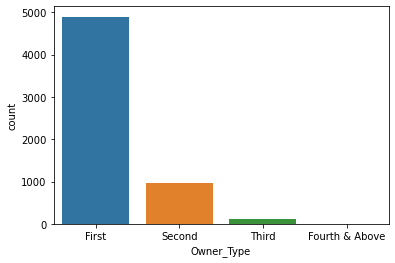

In [68]:
# create a count plot for Owner type

sns.countplot(data = df, x = 'Owner_Type');

By far the most cars have only had one owner. A few have had two.

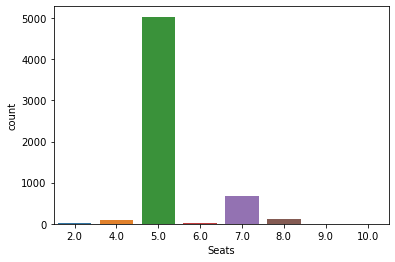

In [69]:
# create a count plot for Seats

sns.countplot(data = df, x = 'Seats');

By far the most cars have 5 doors, a few have 7.

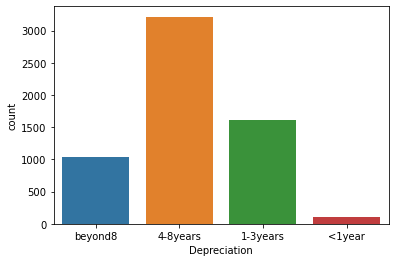

In [70]:
# create a count plot for Depreciation

sns.countplot(data = df, x = 'Depreciation');

Most cars are between 4 and 8 years old, followed by between 1 and 4, and beyond 8. Very few cars are newer than one year.

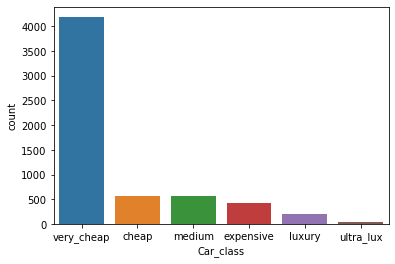

In [71]:
# create a count plot for Car class

sns.countplot(data = df, x = 'Car_class');

Most cars are in the very cheap class. The other categories are roughly equal, with the exception of ultra lux, of which there are very few cars.

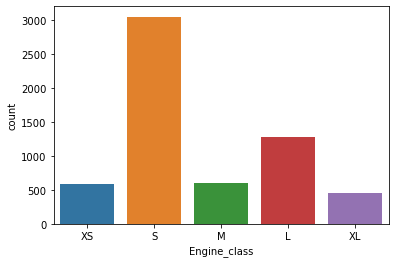

In [72]:
# create a count plot for Engine class

sns.countplot(data = df, x = 'Engine_class');

Most cars have a small engine. Another noticeable category is large. The other 3 categories are roughly equal and much smaller.

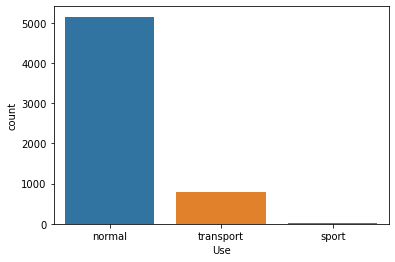

In [73]:
# create a count plot for Use

sns.countplot(data = df, x = 'Use');

Most cars are normal, though there is a noticeable category of transport cars

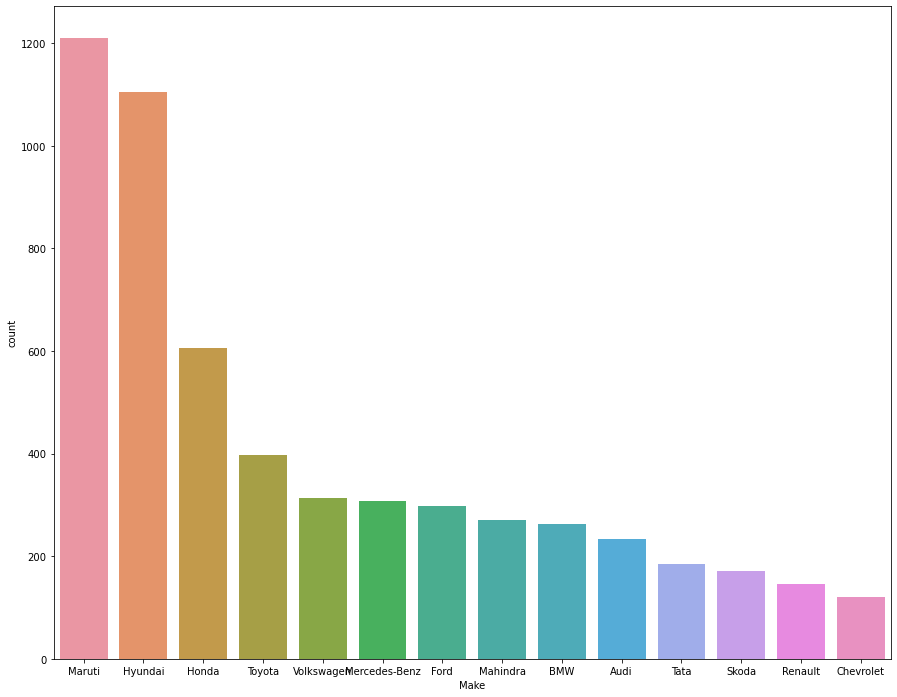

In [74]:
# create a count plot for Make, including only the first 14, which are above 100 values

plt.figure(figsize= (15,12))
sns.countplot(data = df, x = 'Make', order=df['Make'].value_counts().iloc[:14].index);

Top two brands and Maruti and Hyundai. There is a signifiant difference between these two and the rest.

BIVARIATE ANALYSIS

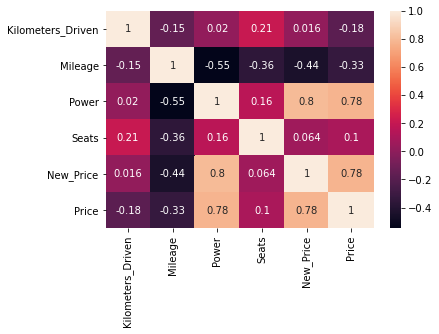

In [75]:
# start with a correlation matrix

sns.heatmap(df.corr(), annot = True);

Price is highly correlated to the orignial price and to the power of the engine. There is a smaller negative correlation with mileage. Interestingly, there is almost no correlation to km driven.

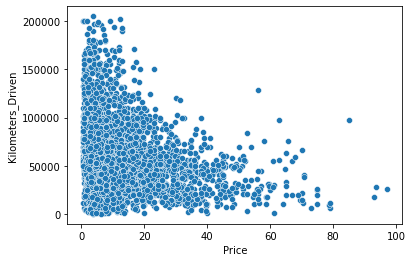

In [76]:
# further investigate price and km driven

sns.scatterplot(data= df, x = 'Price', y = 'Kilometers_Driven');

Although the cars with the most km driven tend to have the lowest price and vice versa, it is obvious that for the vast majority of cases the relationship is not that clear. This means that other variables play a more important role than just km driven.

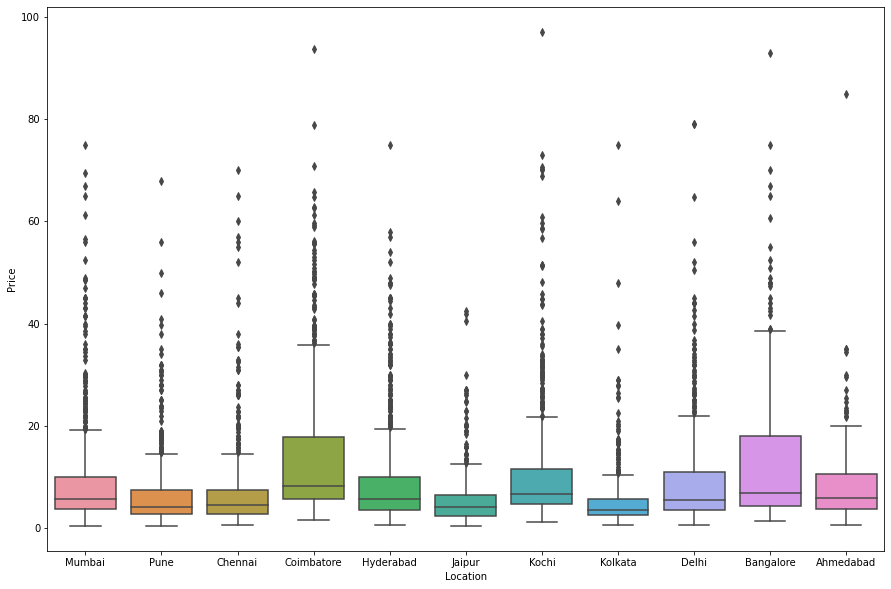

In [77]:
# investigate local preferences in term of price

plt.figure(figsize = (15,10))
sns.boxplot(data = df, x = 'Location', y = 'Price');

This is interesting as it show the local preference in terms of price. There are regions where only cheaper cars are bought: Jaipur, Kolkata, Ahmedabad. There are regions where the demand is more varied: Coimbatore, Kochi, Mumbai and Bangalore.

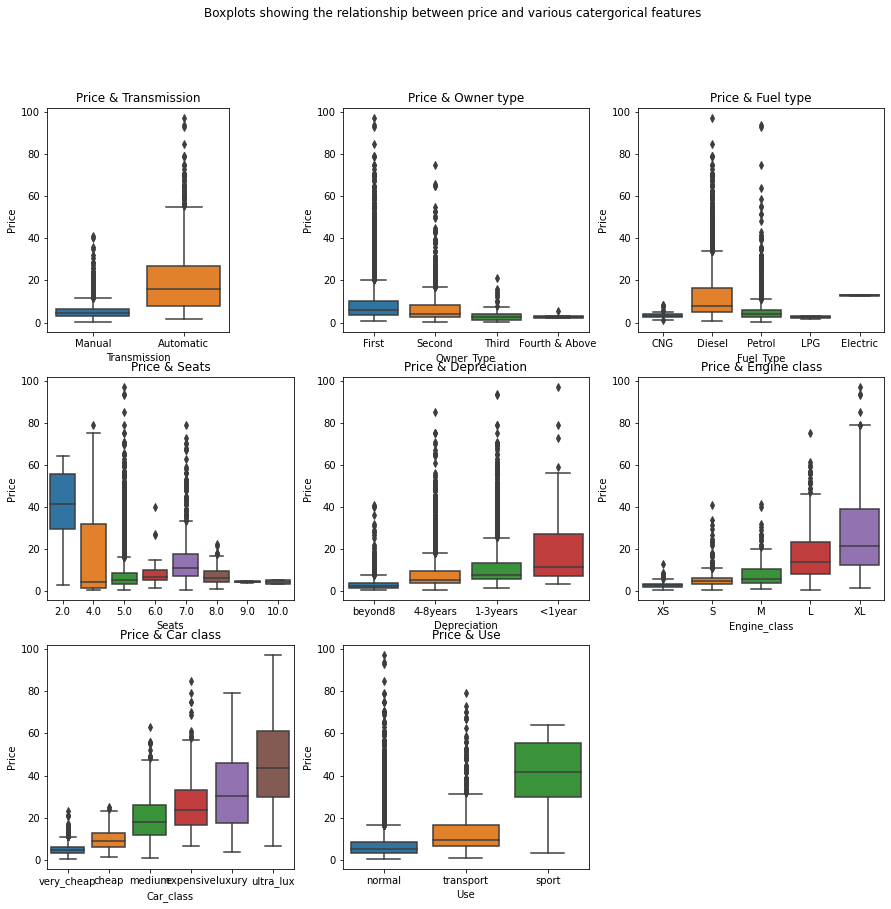

In [78]:
# investigate the effect of transmission on price

fig = plt.figure(figsize = (15,14))
fig.suptitle('Boxplots showing the relationship between price and various catergorical features')

plt.subplot(341)
plt.title('Price & Transmission')
sns.boxplot(data = df, x = 'Transmission', y = 'Price');

plt.subplot(332)
plt.title('Price & Owner type')
sns.boxplot(data = df, x = 'Owner_Type', y = 'Price');

plt.subplot(333)
plt.title('Price & Fuel type')
sns.boxplot(data = df, x = 'Fuel_Type', y = 'Price');

plt.subplot(334)
plt.title('Price & Seats')
sns.boxplot(data = df, x = 'Seats', y = 'Price');

plt.subplot(335)
plt.title('Price & Depreciation')
sns.boxplot(data = df, x = 'Depreciation', y = 'Price');

plt.subplot(336)
plt.title('Price & Engine class')
sns.boxplot(data = df, x = 'Engine_class', y = 'Price');

plt.subplot(337)
plt.title('Price & Car class')
sns.boxplot(data = df, x = 'Car_class', y = 'Price');

plt.subplot(338)
plt.title('Price & Use')
sns.boxplot(data = df, x = 'Use', y = 'Price');

These graphs show:
1. Automatic cars are significantly more expensive than manual ones
2. There is a big price range for one and two previous owners, beyond that the variation shrinks.
3. Diesel tend to be somewhat more expensive than petrol, both have a large range. The other types are few in number.
4. Cars with 2 seats are a lot more expensive on average. 5 and 7 seats are the most common types and thus tend to have a large range of prices, though 7 seats appear to be slightly more expensive.
5. Depreciation reflects the expected pattern of price loss. The 1-3 and 4-8 categories are very large and thus include a wide range of prices, though on average the trend is respected.
6. Engine class behaves as expected: the bigger the size the more expensive the car.
7. Similarly, car class shows a linear increase in price. Medium and expensive cars have some outliers, which most likely reflects a less than perfect class allocation.
8. Sport cars are abnormally expensive, whilst transport car are on average more expensive than normal cars. Normal cars cover a very wide range of prices.

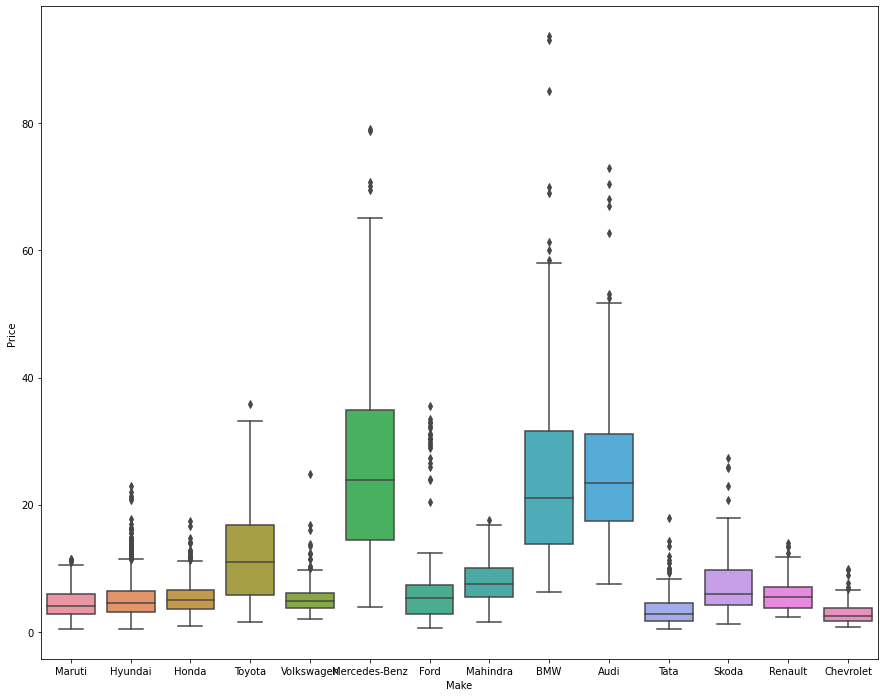

In [79]:
# finally, I will look at the make, again including only the first 14, which have above 100 values

plt.figure(figsize= (15,12))
sns.boxplot(data = df, x = 'Make', order=df['Make'].value_counts().iloc[:14].index, y = 'Price');

Interesting finding: the first 3 most populous makes have a relatively small price range, mostly situated in the lower end. Whilst, as expected, brands like Toyota, Mercedes-Benz, BMW and Audi are on average more expensive and have a greater range of prices.

EDA CONCLUSIONS:

1. The est places to sell most cars are Mumbai and Hyderabad.
2. Most people prefer a manual car, with either diesel or petrol fuel type, 5 seats, and with a small engine. They would prefer on average not more than one previous owner and a car age of between 4 and 8 years.
3. Most people want a small, very cheap car, usually either a Maruti or a Hyundai.
4. Different places have different price ranges: whilst we should almost solely sell cheap cars in Jaipur, Kolkata or Ahmedabad, we could attempt to sell more expensive ones in Coimbatore, Kochi, Mumbai or Bangalore.

STEP 6 - NORMALISATION OF THE DISTRIBUTION

In [80]:
# before any transformations, I will separate the target feature from the rest to prevent any data leakage

y = df['Price']
X = df.drop('Price', axis = 1)

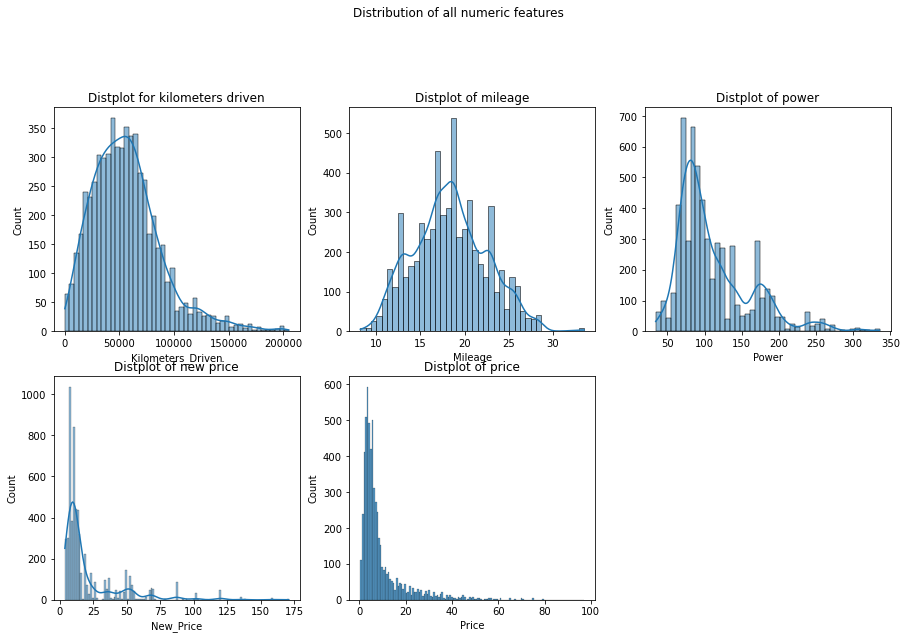

In [81]:
# I will investigate the distribution of the numerical cols

fig = plt.figure(figsize = (15,14))
fig.suptitle('Distribution of all numeric features')

plt.subplot(331)
plt.title('Distplot for kilometers driven')
sns.histplot(X['Kilometers_Driven'], kde = True);

plt.subplot(332)
plt.title('Distplot of mileage')
sns.histplot(X['Mileage'], kde = True);

plt.subplot(333)
plt.title('Distplot of power')
sns.histplot(X['Power'], kde = True);

plt.subplot(334)
plt.title('Distplot of new price')
sns.histplot(X['New_Price'], kde = True);

plt.subplot(335)
plt.title('Distplot of price')
sns.histplot(y);

Whilst Mileage appears to have a normal distribution, the others do not, instead having a right tail (skew). These will need a transformation.

In [82]:
# check for negative or zero values as this determines the type of transformation needed

X.describe()

,Kilometers_Driven,Mileage,Power,Seats,New_Price
count,5964.000000,5964.000000,5964.000000,5964.000000,5964.000000
mean,56554.095741,18.389494,111.534951,5.277666,21.128772
std,31867.849785,4.123997,49.279280,0.788372,23.297813
min,171.000000,8.200000,34.200000,2.000000,3.910000
25%,34000.000000,15.500000,76.875000,5.000000,7.880000
50%,53000.000000,18.342252,97.700000,5.000000,11.300000
75%,72506.000000,21.100000,138.030000,5.000000,21.085000
max,205000.000000,33.540000,335.300000,10.000000,171.000000


Neither of these features have negative or zero values. This means that we can use the log transformation.

In [83]:
# create a list with the 3 feaures to be transformed. Create new cols by adding '_log' to the original names
# using the function np.log and then delete the old ones

cols = ['Kilometers_Driven', 'Power', 'New_Price']
for col in cols:
    X[col + '_log'] = np.log(X[col])
X.drop(cols, axis=1, inplace=True)

y = np.log(y)

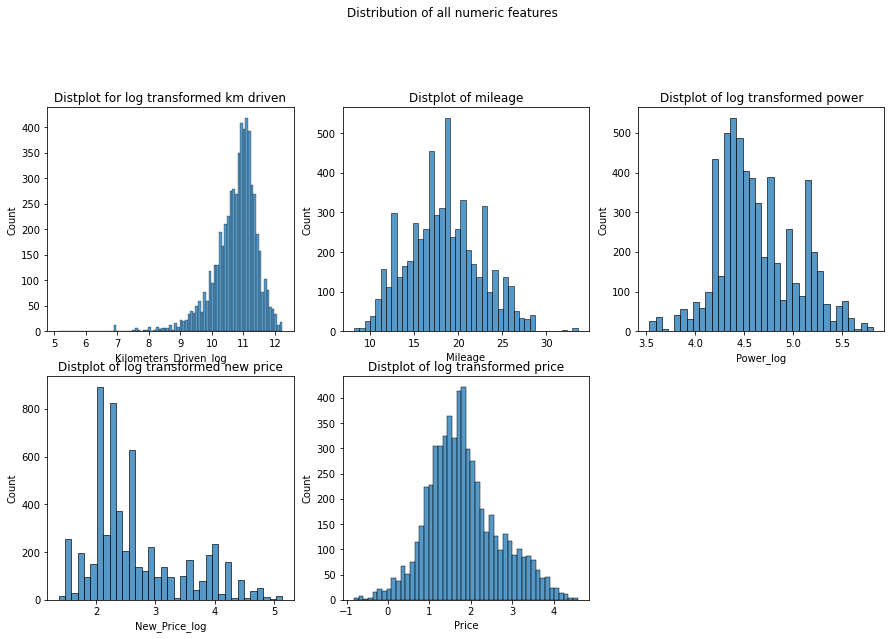

In [84]:
# plot the distributions again to observe the changes

fig = plt.figure(figsize = (15,14))
fig.suptitle('Distribution of all numeric features')

plt.subplot(331)
plt.title('Distplot for log transformed km driven')
sns.histplot(X['Kilometers_Driven_log']);

plt.subplot(332)
plt.title('Distplot of mileage')
sns.histplot(df['Mileage']);

plt.subplot(333)
plt.title('Distplot of log transformed power')
sns.histplot(X['Power_log']);

plt.subplot(334)
plt.title('Distplot of log transformed new price')
sns.histplot(X['New_Price_log']);

plt.subplot(335)
plt.title('Distplot of log transformed price')
sns.histplot(y);

It appears that the distributions have been succesfully transformed and look more normal now.

STEP 7 - RESCALING

In [85]:
# I will use Z tranformation to rescale all numerical features

std_scaler = StandardScaler()

cols = ['Kilometers_Driven_log', 'Power_log', 'New_Price_log', 'Mileage']
for col in cols:
    X[col + '_Ztrans'] = std_scaler.fit_transform(X[[col]])
X.drop(cols, axis=1, inplace=True)



In [86]:
# the target value needs to be sorted separately, since it must first be converted into a dataframe
y = std_scaler.fit_transform(y.to_frame())

STEP 8 - ENCODING CATEGORICAL FEATURES

In [87]:
# I will use one-hot encoding for the categorical variables
enc = OneHotEncoder()
df_enc = enc.fit_transform(X[['Location','Fuel_Type','Transmission','Owner_Type', 'Seats', 'Depreciation', 'Car_class', 'Engine_class',
'Make', 'Use']]).toarray()

# create feature names and then create a dataframe
enc_cols = enc.get_feature_names(['Location','Fuel_Type','Transmission','Owner_Type', 'Seats', 'Depreciation', 'Car_class', 'Engine_class',
'Make', 'Use'])
enc_frame =  pd.DataFrame(df_enc, columns= enc_cols)
enc_frame.head()

,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_2.0,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0,Depreciation_1-3years,Depreciation_4-8years,Depreciation_<1year,Depreciation_beyond8,Car_class_cheap,Car_class_expensive,Car_class_luxury,Car_class_medium,Car_class_ultra_lux,Car_class_very_cheap,Engine_class_L,Engine_class_M,Engine_class_S,Engine_class_XL,Engine_class_XS,Make_Ambassador,Make_Audi,Make_BMW,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Honda,Make_Hyundai,Make_ISUZU,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo,Use_normal,Use_sport,Use_transport
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [88]:
# join it with the original one
X = X.join(enc_frame)
X.head()

,Location,Fuel_Type,Transmission,Owner_Type,Seats,Depreciation,Use,Car_class,Engine_class,Make,Kilometers_Driven_log_Ztrans,Power_log_Ztrans,New_Price_log_Ztrans,Mileage_Ztrans,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_2.0,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0,Depreciation_1-3years,Depreciation_4-8years,Depreciation_<1year,Depreciation_beyond8,Car_class_cheap,Car_class_expensive,Car_class_luxury,Car_class_medium,Car_class_ultra_lux,Car_class_very_cheap,Engine_class_L,Engine_class_M,Engine_class_S,Engine_class_XL,Engine_class_XS,Make_Ambassador,Make_Audi,Make_BMW,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Honda,Make_Hyundai,Make_ISUZU,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo,Use_normal,Use_sport,Use_transport
0,Mumbai,CNG,Manual,First,5.0,beyond8,normal,very_cheap,XS,Maruti,0.616897,-1.407807,-1.225382,1.991077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Pune,Diesel,Manual,First,5.0,4-8years,normal,very_cheap,M,Hyundai,-0.186814,0.517015,0.128748,0.310527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Chennai,Petrol,Manual,First,5.0,4-8years,normal,very_cheap,S,Honda,-0.022574,-0.359110,-0.660372,-0.045953,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Chennai,Diesel,Manual,First,7.0,4-8years,transport,very_cheap,S,Maruti,0.887004,-0.357430,-0.319588,0.577281,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Coimbatore,Diesel,Automatic,Second,5.0,4-8years,normal,expensive,L,Audi,-0.198349,0.789021,1.643424,-0.773464,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [89]:
# drop the unencoded cols

X.drop(['Location','Fuel_Type','Transmission','Owner_Type', 'Seats', 'Depreciation', 'Car_class', 'Engine_class',
'Make', 'Use'], axis = 1, inplace = True)


STEP 9 - TRAIN TEST SPLIT

In [112]:
# I will train/test split 70% - 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

STEP 10 - FITTING THE MODEL

In [113]:
# fitting the model

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

STEP 11 - CHECKING PERFORMANCE

In [114]:
# checking R squared on the training data

print(
    "The score (R-squared) on the training set is ",
    reg.score(X_train, y_train),
)

The score (R-squared) on the training set is  0.9206049801905968


In [115]:
# checkin R squared on the testing data

print(
    "The score (R-squared) on the test set is ", 
    reg.score(X_test, y_test)
    )

The score (R-squared) on the test set is  0.9129506239050724


In [116]:
# checkin R squared adjusted on the testing data

print(
    "The R-Squared adjusted on the test set is",
    1 - ( 1-reg.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
)

The R-Squared adjusted on the test set is 0.9171749818664765


In [117]:
# checking RMSE on training data

print(
    "The Root Mean Square Error (RMSE) of the model for the training set is ",
    np.sqrt(mean_squared_error(y_train, reg.predict(X_train))),
)

The Root Mean Square Error (RMSE) of the model for the training set is  0.2811918125905126


In [118]:
# checking RMSE on testing data

print(
    "The Root Mean Square Error (RMSE) of the model for the test set is ",
    np.sqrt(mean_squared_error(y_test, reg.predict(X_test))),
)

The Root Mean Square Error (RMSE) of the model for the test set is  0.29637016089429546


In [119]:
# checking Mean Absolute Error (MAE) on training data

print(
    "The Mean Absolute Error (MAE) of the model for the training set is ",
    mean_absolute_error(y_train, reg.predict(X_train)),
)

The Mean Absolute Error (MAE) of the model for the training set is  0.21461902945551534


In [120]:
# checking Mean Absolute Error (MAE) on testing data

print(
    "The Mean Absolute Error (MAE) of the model for the test set is ",
    mean_absolute_error(y_test, reg.predict(X_test)),
)

The Mean Absolute Error (MAE) of the model for the test set is  0.22357575124067527


CONCLUSIONS

1. The train and test $R^2$ are 0.92 and 0.91, indicating that the model explains 92% and 91% of the total variation in the train and test sets respectively. The scores are comparable, which indicates that the model is not overfit.
2. The adjusted $R^2$ is 0.91.
3. RMSE values for the training set (0.281) and testing set (0.296) are very similar. 
4. MAE shows that the model can predict the prices with a mean error of 0.223 on the test set.


STEP 12 - COEFFICIENT ANALYSIS

In [121]:
coef_df = pd.DataFrame(
    np.append(reg.coef_, reg.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
Kilometers_Driven_log_Ztrans,-1.209409e-01
Power_log_Ztrans,3.193836e-01
New_Price_log_Ztrans,3.357149e-01
Mileage_Ztrans,3.611390e-02
Location_Ahmedabad,-2.591833e+09
Location_Bangalore,-2.591833e+09
Location_Chennai,-2.591833e+09
Location_Coimbatore,-2.591833e+09
Location_Delhi,-2.591833e+09
Location_Hyderabad,-2.591833e+09


OVERVIEW:
1. Major positive factors: Transmission type, number of seats, mileage (log and z transformed), new_price (log and z transformed) and power (log and z transformed).
2. Major negative factors: owner type, location, use (transport), and fuel type.

INSIGHTS AND CONCLUSIONS

1. A linear regression model was built for Cars4U, which predicted the price of a used car with an accuracy of $R^2$ = 91% on the testing set. It predicted with a mean error of 0.223 on the testing set.

2. Transmission type, number of seats, mileage, new price and power were found to increase the price.

3. Conversely, owner type, location, transport use and fuel type were found to decrease the price.

4. During the EDA it was discovered that in certain locations only cheap cars are in demand, whilst in others more expensive ones could be advertised.

5. Most popular makes are Maruti and Hyundai. The average buyer prefers very cheap, small cars, with one previous owner, and between 4 and 8 years of age.